# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
sns.set_style("whitegrid")

# Baseline
### Concatenate Results

In [2]:
try:
    baseline = pd.read_csv("../../output/csv/baseline/baseline.csv")
except:
    # format bag of words result file
    bow = pd.read_csv("../../output/csv/baseline/partial_results/bow.csv")
    bow = bow.loc[((bow["ngrams"]=="(1,1)") | (bow["ngrams"]=="(1,2)") | (bow["ngrams"]=="(1,3)")) & (bow["length"]!="StandardScaler")]
    bow["ngrams"] = bow["ngrams"].apply(lambda x: x.replace(",", ", "))
    bow = bow.rename(columns={"length": "length_text"})
    bow["text_extraction"] = bow["text_extraction"].apply(lambda x: x.replace("-", " "))

    # format tfidf result file
    tfidf = pd.read_csv("../../output/csv/baseline/partial_results/tfidf.csv")
    tfidf = tfidf.rename(columns={"length_used": "length_text", "feature_extraction": "text_extraction", "n_grams": "ngrams", "model": "models"})
    tfidf = tfidf[["length_text", "ngrams", "text_extraction", "models", "accuracy", "f1", "roc_auc"]]
    tfidf["ngrams"] = tfidf["ngrams"].apply(lambda x: x.replace("'", ""))
    tfidf = tfidf.loc[((tfidf["ngrams"]=="(1, 1)") | (tfidf["ngrams"]=="(1, 2)") | (tfidf["ngrams"]=="(1, 3)")) & (tfidf["length_text"]!="StandardScaler") & (tfidf["models"]=="Logistics")]
    tfidf["models"] = tfidf["models"].apply(lambda x: "Logistic Regression" if x=="Logistics" else x)

    # format hashing result file
    hashing = pd.read_csv("../../output/csv/baseline/partial_results/hashing.csv")
    hashing = hashing.loc[(hashing["models"]=="Logistic Regression")]
    hashing = hashing.rename(columns={"length_used ": "length_text", "text extraction techniques": "text_extraction",
                                    "n-grams": "ngrams", "roc_acu": "roc_auc"})
    hashing["length_text"] = hashing["length_text"].apply(lambda x: "MinMaxScaler" if x=="minmaxscaler" else x)
    hashing["ngrams"] = hashing["ngrams"].apply(lambda x: x.replace(",", ", "))
    hashing["text_extraction"] = hashing["text_extraction"].str.title()

    # format word2vec result file
    w2v = pd.read_csv("../../output/csv/baseline/partial_results/w2v.csv")
    w2v = w2v.rename(columns={"length_used": "length_text", "model": "models"})
    w2v = w2v.loc[(w2v["length_text"]!="StandardScaler") & (w2v["models"]=="LogisticRegression")]
    w2v["models"] = w2v["models"].apply(lambda x: "Logistic Regression" if x=="LogisticRegression" else x)

    # concatenate baseline result file
    baseline = pd.concat([bow, tfidf, hashing, w2v], axis=0, ignore_index=True)
    baseline["length_text"] = baseline["length_text"].apply(lambda x: "use" if x=="MinMaxScaler" else "no use")

    # save file
    baseline.to_csv("../../output/csv/baseline/baseline.csv", index=False)

### Impact of Length Text

Text(0, 0.5, 'Accuracy')

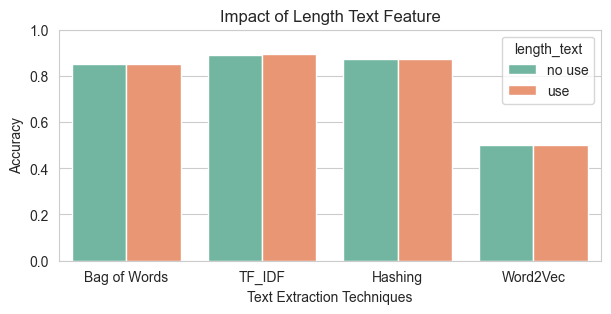

In [3]:
plt.figure(figsize=(7, 3))
sns.barplot(data=baseline[baseline["ngrams"]=="(1, 3)"], x="text_extraction", y="accuracy", hue="length_text")
plt.ylim(top=1)
plt.title("Impact of Length Text Feature")
plt.xlabel("Text Extraction Techniques")
plt.ylabel("Accuracy")

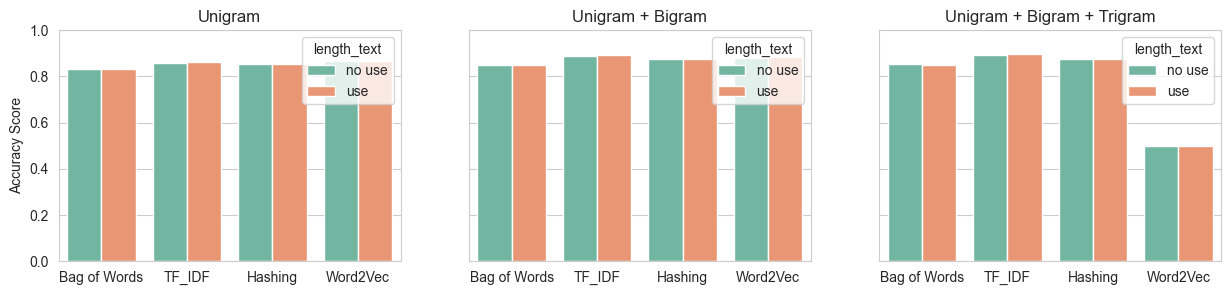

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3), sharey=True)
title = ["Unigram",
         "Unigram + Bigram",
         "Unigram + Bigram + Trigram"]

for i in range(3):
    sns.barplot(data=baseline[baseline["ngrams"]==f"(1, {i+1})"], x="text_extraction", y="accuracy", hue="length_text", ax=ax[i])
    ax[i].set_ylim(top=1)
    ax[i].set_title(title[i])
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Accuracy Score")

### Performance of Different Ngrams

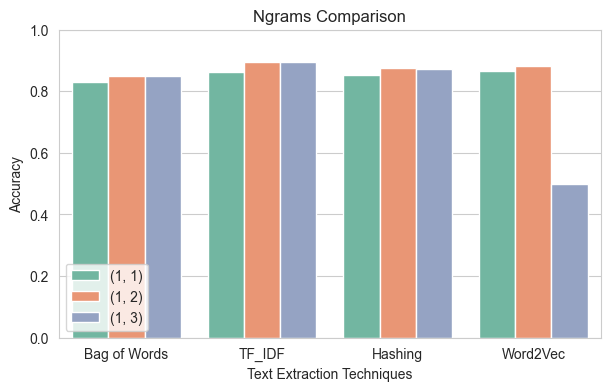

In [5]:
plt.figure(figsize=(7, 4))
sns.barplot(data=baseline[baseline["length_text"]=="use"].sort_values(by="ngrams"), x="text_extraction", y="accuracy", hue="ngrams")
plt.ylim(top=1)
plt.title("Ngrams Comparison")
plt.xlabel("Text Extraction Techniques")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [6]:
rank = baseline.loc[(baseline["ngrams"]=="(1, 2)") & (baseline["length_text"]=="use")]
rank = rank.sort_values(by=["accuracy", "f1", "roc_auc"])
rank

,length_text,ngrams,text_extraction,models,accuracy,f1,roc_auc
3,use,"(1, 2)",Bag of Words,Logistic Regression,0.848660,0.848290,0.934540
16,use,"(1, 2)",Hashing,Logistic Regression,0.876000,0.874000,0.948000
21,use,"(1, 2)",Word2Vec,Logistic Regression,0.883137,0.883712,0.943551
7,use,"(1, 2)",TF_IDF,Logistic Regression,0.893352,0.892481,0.960274


Text(0.5, 1.0, 'Different Text Extraction Techniques (Baseline)')

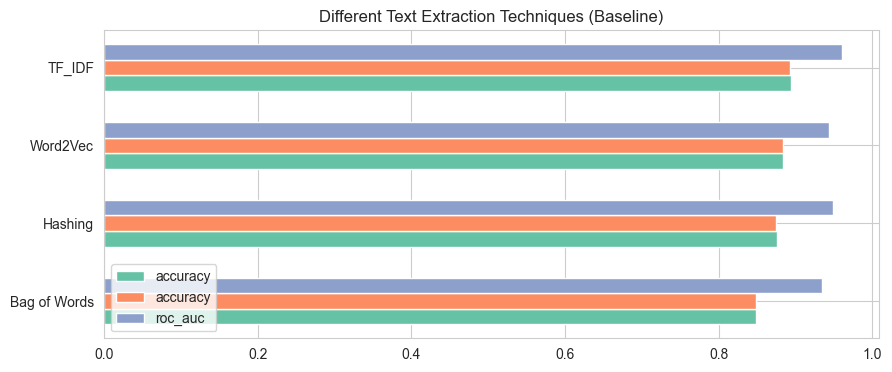

In [7]:
y = np.arange(4)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.barh(y=y-0.2, width=rank.loc[:, "accuracy"], height=0.2, align="center", label="accuracy")
ax.barh(y=rank["text_extraction"], width=rank.loc[:, "f1"], height=0.2, alpha=1, align="center", label="accuracy")
ax.barh(y=y+0.2, width=rank.loc[:, "roc_auc"], height=0.2, align="center", label="roc_auc")
ax.legend(loc="lower left")
ax.set_title("Different Text Extraction Techniques (Baseline)")

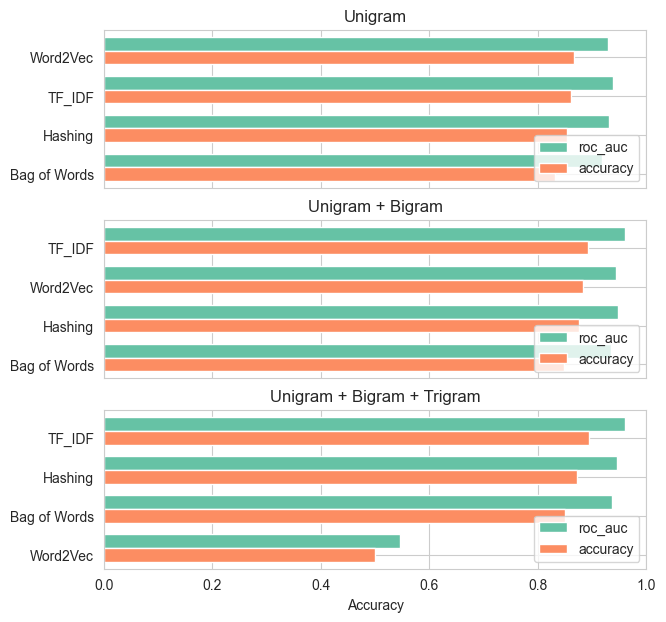

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 7), sharex=True)

title = ["Unigram",
         "Unigram + Bigram",
         "Unigram + Bigram + Trigram"]

for i in range(3):
    rank = baseline.loc[(baseline["ngrams"]==f"(1, {i+1})") & (baseline["length_text"]=="use")].sort_values(by=["accuracy", "f1", "roc_auc"])
    ax[i].barh(y=y+0.35, width=rank.loc[:, "roc_auc"], height=0.35, align="center", label="roc_auc")
    ax[i].barh(y=rank["text_extraction"], width=rank.loc[:, "accuracy"], height=0.35, alpha=1, align="center", label="accuracy")
    # ax[i].barh(y=y+0.35, width=rank.loc[:, "accuracy"], height=0.35, align="center", label="accuracy")
    ax[i].set_title(title[i])
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 1)
    if i==2:
        ax[i].set_xlabel("Accuracy")
    ax[i].legend(loc="lower right")

Text(0.5, 1.0, 'Different Text Extraction Techniques (Baseline)')

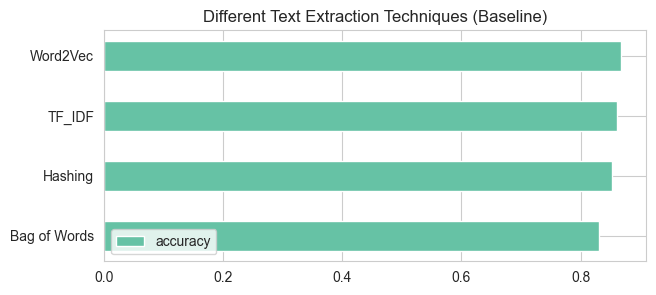

In [9]:
rank = baseline.loc[(baseline["ngrams"]=="(1, 1)") & (baseline["length_text"]=="use")]
rank = rank.sort_values(by=["accuracy", "f1", "roc_auc"])

y = np.arange(4)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
# ax.barh(y=y+0.35, width=rank.loc[:, "roc_auc"], height=0.35, align="center", label="roc_auc")
ax.barh(y=rank["text_extraction"], width=rank.loc[:, "accuracy"], height=0.5, alpha=1, align="center", label="accuracy")
ax.legend(loc="lower left")
ax.set_title("Different Text Extraction Techniques (Baseline)")

Text(0.5, 1.0, 'Different Text Extraction Techniques (Baseline)')

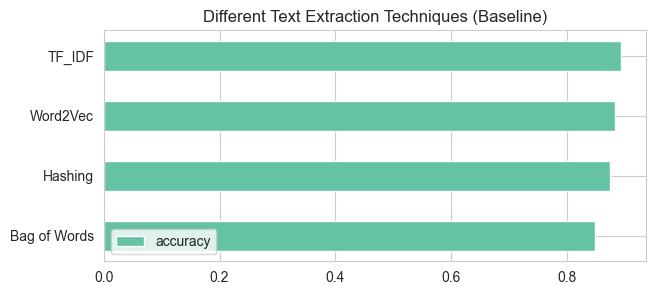

In [10]:
rank = baseline.loc[(baseline["ngrams"]=="(1, 2)") & (baseline["length_text"]=="use")]
rank = rank.sort_values(by=["accuracy", "f1", "roc_auc"])

y = np.arange(4)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
# ax.barh(y=y+0.35, width=rank.loc[:, "roc_auc"], height=0.35, align="center", label="roc_auc")
ax.barh(y=rank["text_extraction"], width=rank.loc[:, "accuracy"], height=0.5, alpha=1, align="center", label="accuracy")
ax.legend(loc="lower left")
ax.set_title("Different Text Extraction Techniques (Baseline)")

Text(0.5, 1.0, 'Different Text Extraction Techniques (Baseline)')

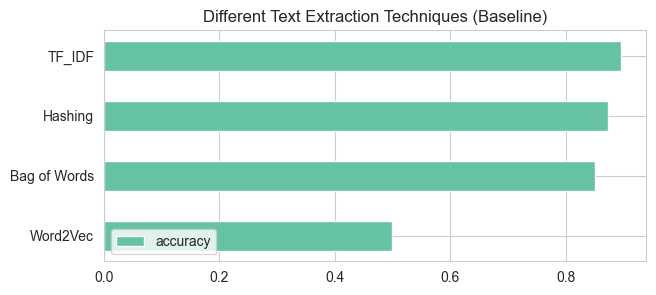

In [11]:
rank = baseline.loc[(baseline["ngrams"]=="(1, 3)") & (baseline["length_text"]=="use")]
rank = rank.sort_values(by=["accuracy", "f1", "roc_auc"])

y = np.arange(4)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
# ax.barh(y=y+0.35, width=rank.loc[:, "roc_auc"], height=0.35, align="center", label="roc_auc")
ax.barh(y=rank["text_extraction"], width=rank.loc[:, "accuracy"], height=0.5, alpha=1, align="center", label="accuracy")
ax.legend(loc="lower left")
ax.set_title("Different Text Extraction Techniques (Baseline)")

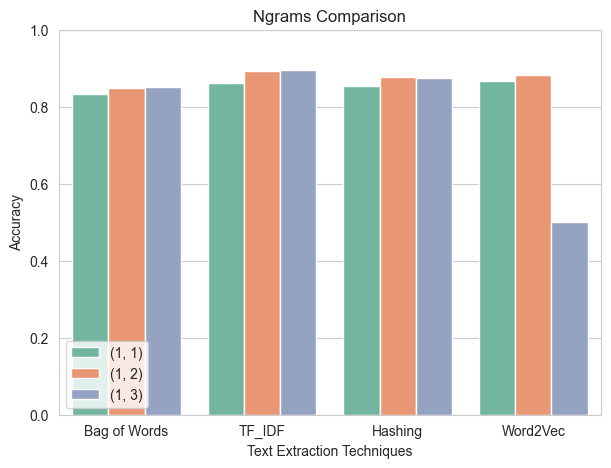

In [12]:
plt.figure(figsize=(7, 5))
sns.barplot(data=baseline[baseline["length_text"]=="use"].sort_values(by="ngrams"), x="text_extraction", y="accuracy", hue="ngrams")
plt.ylim(top=1)
plt.title("Ngrams Comparison")
plt.xlabel("Text Extraction Techniques")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

# Advanced Models
### Concatenate Files

In [13]:
hashing = pd.read_csv("../../output/csv/baseline/partial_results/hashing.csv")
hashing = hashing.rename(columns={"length_used ": "length_text", "text extraction techniques": "text_extraction",
                                  "n-grams": "ngrams", "roc_acu": "roc_auc"})
hashing["length_text"] = hashing["length_text"].apply(lambda x: "MinMaxScaler" if x=="minmaxscaler" else x)
hashing["ngrams"] = hashing["ngrams"].apply(lambda x: x.replace(",", ", "))
hashing["text_extraction"] = hashing["text_extraction"].str.title()
hashing = hashing.loc[(hashing["ngrams"]=="(1, 2)")]
hashing = hashing.drop(columns="length_text").sort_values(by="accuracy", ascending=False).drop_duplicates(subset=["ngrams", "text_extraction", "models"], keep="first")
hashing = hashing.drop(columns=["ngrams"])
hashing

,text_extraction,models,accuracy,f1,roc_auc
6,Hashing,Logistic Regression,0.877,0.875,0.949
11,Hashing,CatBoost,0.864,0.861,0.943
22,Hashing,LightGBM,0.862,0.860,0.943
23,Hashing,XGBoost,0.854,0.851,0.937
10,Hashing,AdaBoost,0.793,0.788,0.882
21,Hashing,KNN,0.570,0.696,0.747


In [14]:
tfidf = pd.read_csv("../../output/csv/baseline/partial_results/tfidf.csv")
tfidf = tfidf.rename(columns={"length_used": "length_text", "feature_extraction": "text_extraction", "n_grams": "ngrams", "model": "models"})
tfidf = tfidf[["length_text", "ngrams", "text_extraction", "models", "accuracy", "f1", "roc_auc"]]
tfidf["ngrams"] = tfidf["ngrams"].apply(lambda x: x.replace("'", ""))
tfidf = tfidf.loc[(tfidf["ngrams"]=="(1, 2)") & (tfidf["length_text"]=="MinMaxScaler")]
tfidf["models"] = tfidf["models"].apply(lambda x: "Logistic Regression" if x=="Logistics" else x)
tfidf = tfidf.drop(columns=["length_text", "ngrams"])
tfidf

,text_extraction,models,accuracy,f1,roc_auc
31,TF_IDF,Logistic Regression,0.893352,0.892481,0.960274
37,TF_IDF,LightGBM,0.867630,0.866199,0.945742
43,TF_IDF,CatBoost,0.876904,0.875724,0.951647
49,TF_IDF,XGBoost,0.858107,0.856154,0.939268
55,TF_IDF,AdaBoost,0.758261,0.755525,0.845458
61,TF_IDF,KNN,0.705950,0.756225,0.834410


In [15]:
w2v = pd.read_csv("../../output/csv/baseline/partial_results/w2v.csv")
w2v = w2v.rename(columns={"length_used": "length_text", "model": "models"})
w2v = w2v.loc[(w2v["ngrams"]=="(1, 2)") & (w2v["models"]!="SVM")]
# w2v = w2v.loc[(w2v["length_text"]=="MinMaxScaler") & (w2v["ngrams"]=="(1, 2)") & (w2v["models"]!="SVM")]
w2v["models"] = w2v["models"].apply(lambda x: "Logistic Regression" if x=="LogisticRegression" else x)
w2v = w2v.sort_values(by="accuracy", ascending=False).drop_duplicates(subset=["ngrams", "text_extraction", "models"], keep="first")
w2v = w2v.drop(columns=["length_text", "ngrams"])
w2v

,text_extraction,models,accuracy,f1,roc_auc
23,Word2Vec,Catboost,0.887070,0.889021,0.957431
35,Word2Vec,Logistic Regression,0.883681,0.884167,0.943573
22,Word2Vec,LightGBM,0.869905,0.875007,0.951442
24,Word2Vec,XGBoost,0.866665,0.870922,0.946819
33,Word2Vec,KNN,0.861199,0.859714,0.924831
25,Word2Vec,AdaBoost,0.818881,0.828889,0.906793


In [16]:
advanced = pd.concat([tfidf, hashing, w2v], axis=0, ignore_index=True)
advanced
# advanced.to_csv("../../output/csv/advanced/advanced.csv", index=False)

,text_extraction,models,accuracy,f1,roc_auc
0,TF_IDF,Logistic Regression,0.893352,0.892481,0.960274
1,TF_IDF,LightGBM,0.867630,0.866199,0.945742
2,TF_IDF,CatBoost,0.876904,0.875724,0.951647
3,TF_IDF,XGBoost,0.858107,0.856154,0.939268
4,TF_IDF,AdaBoost,0.758261,0.755525,0.845458
5,TF_IDF,KNN,0.705950,0.756225,0.834410
6,Hashing,Logistic Regression,0.877000,0.875000,0.949000
7,Hashing,CatBoost,0.864000,0.861000,0.943000
8,Hashing,LightGBM,0.862000,0.860000,0.943000
9,Hashing,XGBoost,0.854000,0.851000,0.937000
